<a href="https://colab.research.google.com/github/shreyassarda7/Alpha_Research/blob/main/9%2C22%2C55_EMA_Crossover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This is code for Triple SMA Crossover strategy (9, 22, 55)

In [2]:
# Import libraries
from pandas_datareader import data as web
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
# Input the data
stock = input('Stock name is: ')
num_days = int(input('Number of days the analysis needs to be done(Please enter an integer): '))

Stock name is: SBIN.NS
Number of days the analysis needs to be done(Please enter an integer): 2500


In [4]:
start_date = (datetime.datetime.now() - datetime.timedelta(days = num_days)).strftime("%m-%d-%Y")
df = web.DataReader(stock, data_source = 'yahoo', start = start_date)
df.dropna(how = 'any', inplace = True)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-08-19,246.199997,242.934998,243.419998,244.225006,15948060.0,233.761826
2014-08-20,244.830002,240.850006,244.500000,241.475006,16065950.0,231.129654
2014-08-21,247.690002,241.009995,241.399994,246.755005,27963970.0,236.183456
2014-08-22,254.899994,247.975006,247.975006,252.470001,26474960.0,241.653595
2014-08-25,257.739990,249.169998,253.000000,250.615005,26784130.0,239.878082
...,...,...,...,...,...,...
2021-06-17,425.950012,416.600006,421.000000,420.250000,23048331.0,420.250000
2021-06-18,423.899994,402.649994,423.899994,412.899994,45748727.0,412.899994
2021-06-21,421.000000,400.500000,406.350006,419.750000,33128978.0,419.750000


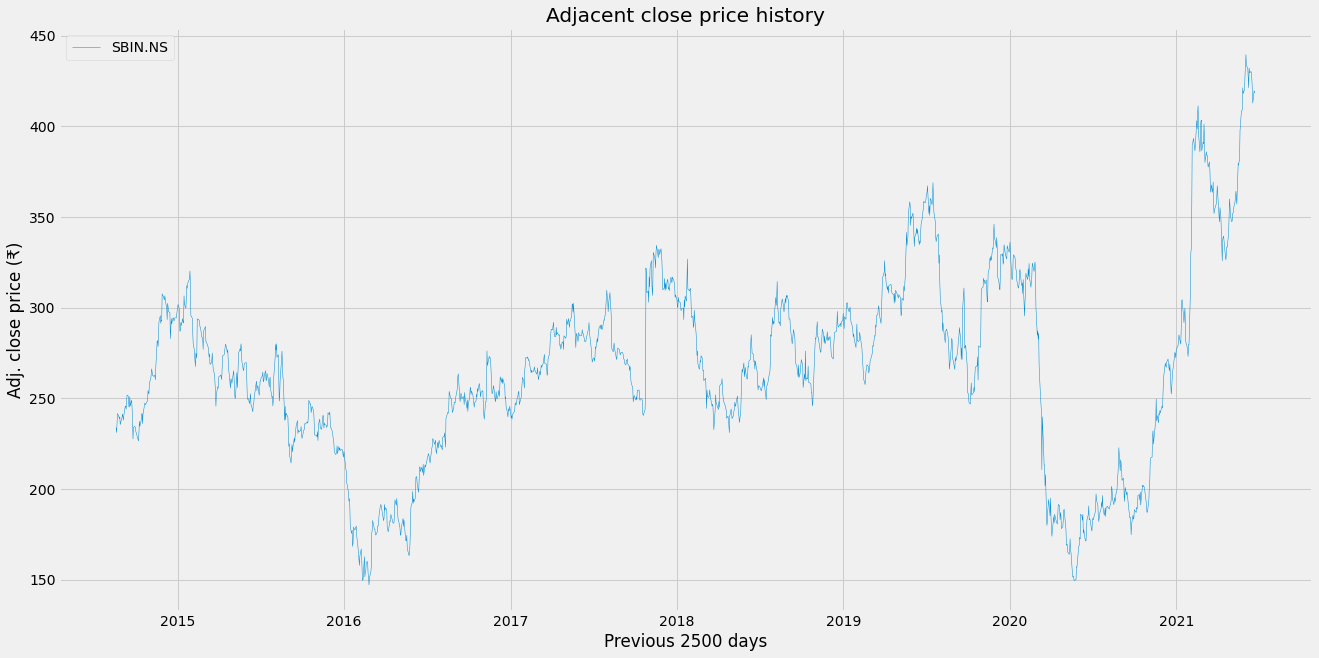

In [5]:
# Visualize data
plt.figure(figsize=(20, 10))
plt.plot(df['Adj Close'], label = stock, linewidth = 0.5)
plt.title('Adjacent close price history')
plt.xlabel('Previous ' + str(num_days) + ' days')
plt.ylabel('Adj. close price (₹)')
plt.legend(loc = 'upper left')
plt.show()

In [6]:
# Create SMA Indiacator
SMA9 = pd.DataFrame()
SMA9['Price'] = df['Adj Close'].ewm(span = 9, adjust = False).mean()
SMA22 = pd.DataFrame()
SMA22['Price'] = df['Adj Close'].ewm(span = 22, adjust = False).mean()
SMA55 = pd.DataFrame()
SMA55['Price'] = df['Adj Close'].ewm(span = 55, adjust = False).mean()

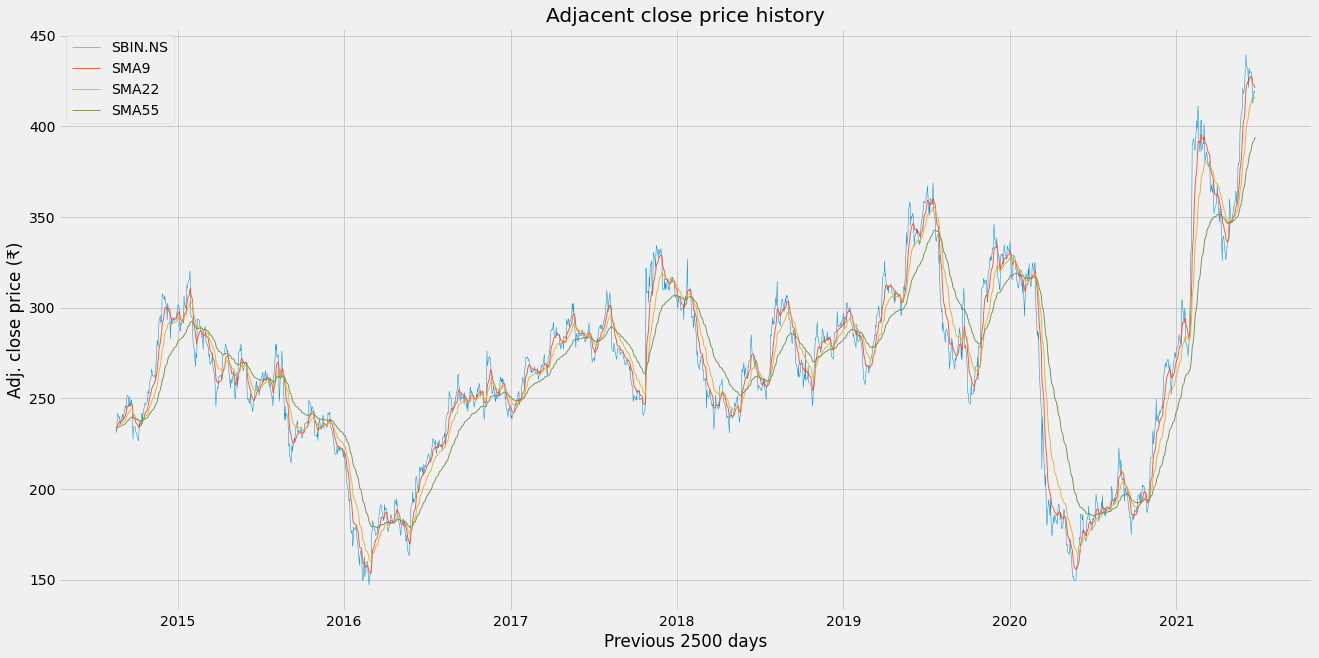

In [7]:
# Visualize Data
plt.figure(figsize=(20, 10))
plt.plot(df['Adj Close'], label = stock, linewidth = 0.5)
plt.plot(SMA9['Price'], label = 'SMA9', linewidth = 0.9)
plt.plot(SMA22['Price'], label = 'SMA22', linewidth = 0.9)
plt.plot(SMA55['Price'], label = 'SMA55', linewidth = 0.9)
plt.title('Adjacent close price history')
plt.xlabel('Previous ' + str(num_days) + ' days')
plt.ylabel('Adj. close price (₹)')
plt.legend(loc = 'upper left')
plt.show()

In [8]:
# Store all Data in new DataFrame
Data = pd.DataFrame()
Data['Price'] = df['Adj Close']
Data['SMA9'] = SMA9['Price']
Data['SMA22'] = SMA22['Price']
Data['SMA55'] = SMA55['Price']
Data['funds'] = 100000         # Initialize funds so that it could later be modified
Data

,Price,SMA9,SMA22,SMA55,funds
Date,,,,,
2014-08-19,233.761826,233.761826,233.761826,233.761826,100000
2014-08-20,231.129654,233.235391,233.532941,233.667819,100000
2014-08-21,236.183456,233.825004,233.763421,233.757664,100000
2014-08-22,241.653595,235.390722,234.449523,234.039661,100000
2014-08-25,239.878082,236.288194,234.921571,234.248176,100000
...,...,...,...,...,...
2021-06-17,420.250000,425.999218,415.425621,390.436846,100000
2021-06-18,412.899994,423.379373,415.206001,391.239101,100000
2021-06-21,419.750000,422.653499,415.601132,392.257348,100000


In [9]:
# Create a function to signal when to buy and when to sell
def buy_sell_signal(data):
  buy_signal = []
  sell_signal = []
  open_position = []
  funds = [100000] * len(data)
  last_funds = 100000
  last_pos = 1
  flag = 0  # flag = 0 means sell_flag and flag = 1 means buy_flag

  for i in range(len(data)):
    if data['Price'][i] > data['SMA55'][i]:
      if flag == 0 and data['SMA9'][i] > data['SMA22'][i]:
        flag = 1
        last_pos = last_funds / data['Price'][i]
        funds[i] = last_funds
        open_position.append(last_pos)
        buy_signal.append(data['Price'][i])
        sell_signal.append(np.NaN)
      else:
        last_funds = data['Price'][i] * last_pos
        funds[i] = last_funds
        open_position.append(last_pos)
        buy_signal.append(np.NaN)
        sell_signal.append(np.NaN)
    elif data['Price'][i] < data['SMA55'][i]:
      if flag == 1 and data['SMA9'][i] < data['SMA22'][i]:
        flag = 0
        last_funds = last_pos * data['Price'][i]
        funds[i] = last_funds
        open_position.append(0)
        buy_signal.append(np.NaN)
        sell_signal.append(data['Price'][i])
      else:
        funds[i] = last_funds
        open_position.append(0)
        buy_signal.append(np.NaN)
        sell_signal.append(np.NaN)
    else:
      open_position.append(0)
      buy_signal.append(np.NaN)
      sell_signal.append(np.NaN)
  return buy_signal, sell_signal, open_position, funds, flag

In [10]:
# Store buy and sell in Data
buy_sell = buy_sell_signal(Data)
#print(buy_sell)
Data['Buy_price'] = buy_sell[0]
Data['Sell_price'] = buy_sell[1]
Data['Open_pos'] = buy_sell[2]
Data['live_pos'] = Data['Open_pos'].multiply(Data['Price'])
Data['funds'] = buy_sell[3]

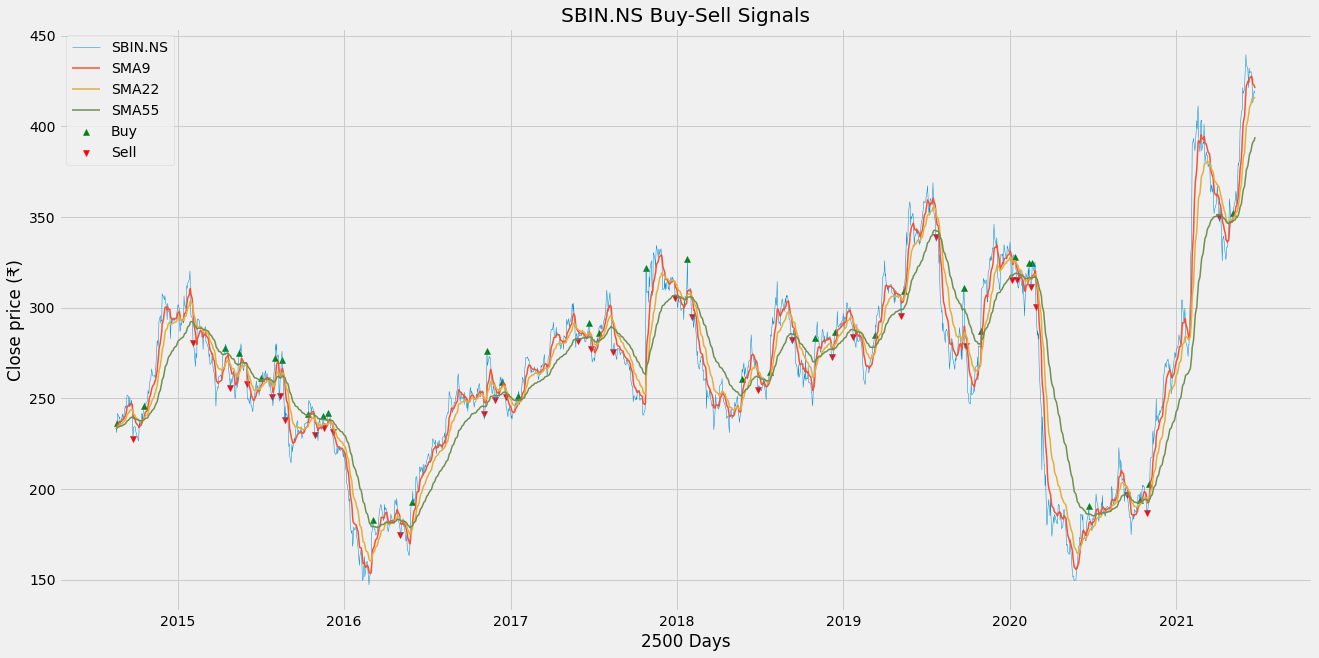

In [11]:
# Visualize Data and strategy to buy and sell NIFTY
plt.figure(figsize = (20, 10))
plt.plot(Data['Price'], label = str(stock), linewidth = 0.5)
plt.plot(Data['SMA9'], label = 'SMA9', linewidth = 1.5)
plt.plot(Data['SMA22'], label = 'SMA22', linewidth = 1.5)
plt.plot(Data['SMA55'], label = 'SMA55', linewidth = 1.5)
plt.scatter(Data.index, Data['Buy_price'], label= 'Buy', marker = '^', color = 'g')
plt.scatter(Data.index, Data['Sell_price'], label= 'Sell', marker = 'v', color = 'r')
plt.title(str(stock) + ' Buy-Sell Signals')
plt.xlabel(str(num_days) + ' Days')
plt.ylabel('Close price (₹)')
plt.legend(loc = 'upper left')
plt.show()

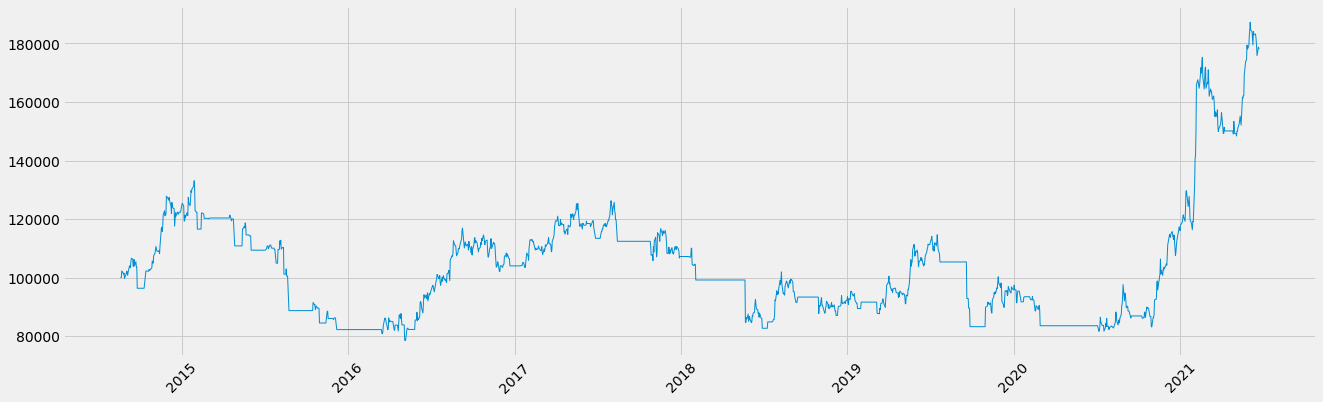

Index(['Price', 'SMA9', 'SMA22', 'SMA55', 'funds', 'Buy_price', 'Sell_price',
       'Open_pos', 'live_pos'],
      dtype='object')

₹ 1 Lac invested using this strategy for 2500 days would have become ₹ 1.78 Lac as per this strategy.

₹ 1 Lac invested using this strategy for 2500 days would have become ₹ 1.79 Lac by using buy and hold strategy.


In [13]:
# Visualize results / PnL
plt.figure(figsize = (20, 6))
plt.plot(Data['funds'], linewidth = 1.0)
plt.xticks(rotation=45)
plt.show()
print(Data.columns)
print('\n₹ 1 Lac invested using this strategy for', num_days, 'days would have become ₹', str(round(0.00001 * Data.iloc[-1, 4], 2)), 'Lac as per this strategy.')
print('\n₹ 1 Lac invested using this strategy for', num_days, 'days would have become ₹', str(round(Data.iloc[-1, 0] / Data.iloc[0, 0], 2)), 'Lac by using buy and hold strategy.')